## Exercises 3 – answers

1\. Write a script to lookup the gene called BCH1 in barley and print the stable ID of this gene.

In [ ]:
library(httr)
library(jsonlite)

fetch_endpoint <- function(server, request, content_type){

    r <- GET(paste(server, request, sep = ""), accept(content_type))

    stop_for_status(r)

    if (content_type == 'application/json'){
        return (fromJSON(content(r, "text", encoding = "UTF-8")))
    } else {
        return (content(r, "text", encoding = "UTF-8"))
    }
}

# define the gene name
gene_name <- "BCH1"

# define the general URL parameters
server <- "http://rest.ensembl.org/"
con <- "application/json"

# define REST query to get the gene ID from the gene name
ext_get_lookup <- paste("lookup/symbol/hordeum_vulgare/", gene_name, "?", sep ="")

get_lookup <- fetch_endpoint(server, ext_get_lookup, con)

stable_id <- get_lookup$id

cat(stable_id)

2\. Get all phenotypes that are associated with variants in the *Arabidopsis thaliana* gene AT3G52430. For each variant print:

   a. The variant ID.
   
   b. The external reference.
   
   c. The phenotype.

In [ ]:
library(httr)
library(jsonlite)

fetch_endpoint <- function(server, request, content_type){

    r <- GET(paste(server, request, sep = ""), accept(content_type))

    stop_for_status(r)

    if (content_type == 'application/json'){
        return (fromJSON(content(r, "text", encoding = "UTF-8")))
    } else {
        return (content(r, "text", encoding = "UTF-8"))
    }
}

# define the URL parameters
server <- "http://rest.ensembl.org/"
con <- "application/json"
ext_phen <- "/phenotype/gene/arabidopsis_thaliana/AT3G52430?include_associated=1"

get_phen <- fetch_endpoint(server, ext_phen, con)

flat_get_phen <- flatten(get_phen, recursive = TRUE)

flat_get_phen[, c("Variation", "attributes.external_reference", "description")]

3\. Get the maize (*Zea mays*) homologue of the *Arabidopsis thaliana* CP33 and print the ID and the aligned sequence of both.

Note that the JSON for the endpoint you need is several layers deep, containing nested lists (appear as square brackets [ ] in the JSON) and key value sets (appear as curly brackets { } in the JSON).

In [ ]:
library(httr)
library(jsonlite)

fetch_endpoint <- function(server, request, content_type){

    r <- GET(paste(server, request, sep = ""), accept(content_type))

    stop_for_status(r)

    if (content_type == 'application/json'){
        return (fromJSON(content(r, "text", encoding = "UTF-8")))
    } else {
        return (content(r, "text", encoding = "UTF-8"))
    }
}

gene <- "CP33"

# define the URL parameters
server <- "http://rest.ensembl.org/"
con <- "application/json"
ext_hom <- paste("homology/symbol/arabidopsis_thaliana/", gene, "?target_species=zea_mays", sep = "")

get_hom <- fetch_endpoint(server, ext_hom, con)

homologies <- get_hom$data$homologies

for (homology in homologies) {
    homology

    source_id <- homology$source$id
    source_seq <- homology$source$align_seq
    source_species <- homology$source$species

    target_id <- homology$target$id
    target_seq <- homology$target$align_seq
    target_species <- homology$target$species
    
    cat(">", source_id, source_species, "\n", source_seq, "\n>", target_id, target_species, "\n", target_seq)
    }



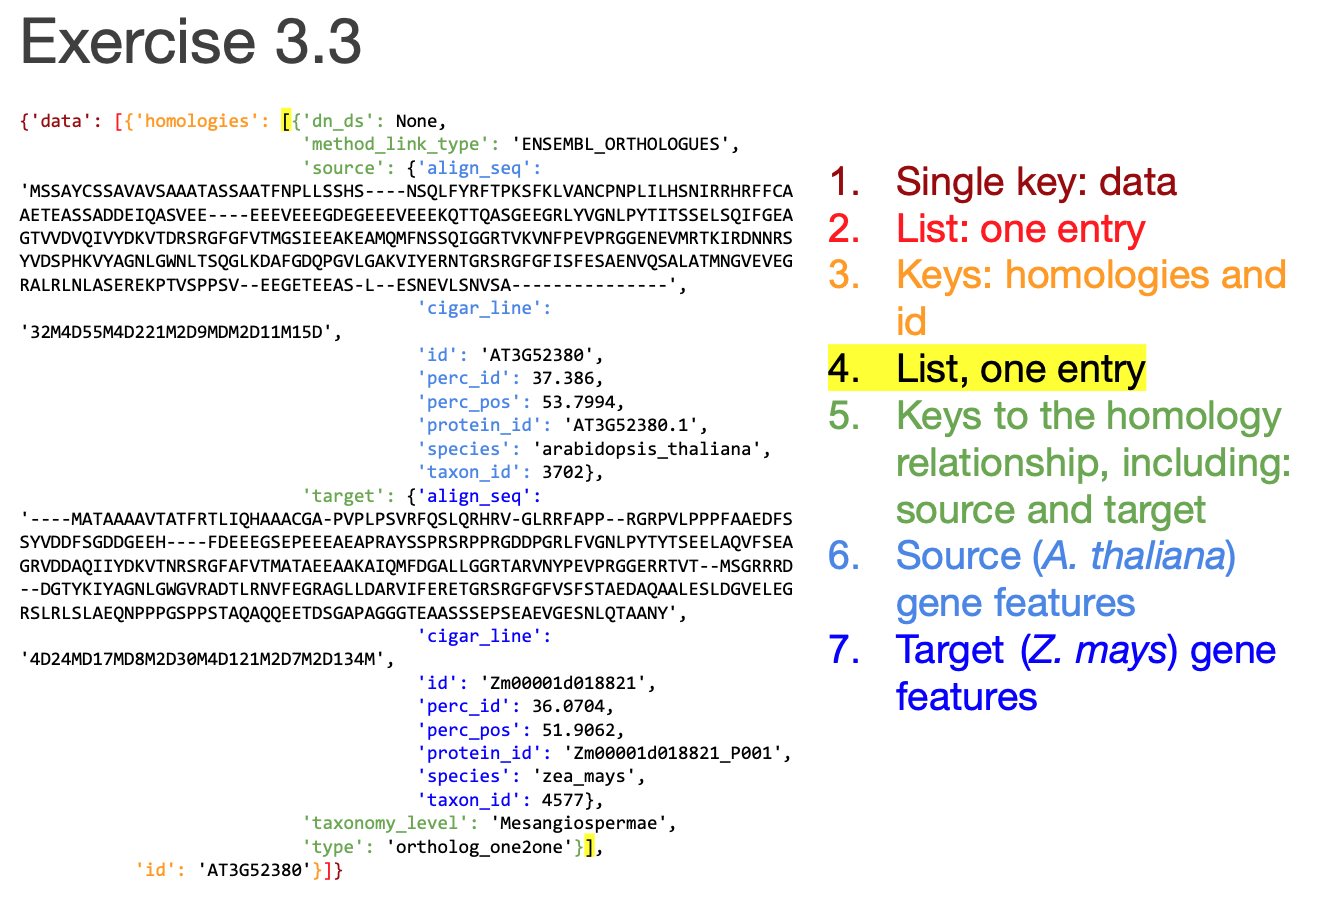

[Next page: Other content types](4_Other_content_types.ipynb)